# Figure 2

In [9]:
import stylia
import numpy as np
import matplotlib.pyplot as plt
from stylia import TWO_COLUMNS_WIDTH, ONE_COLUMN_WIDTH
import pandas as pd

## Search aggregates

In [5]:
df = pd.read_csv("../results/cheese_search_aggregate.csv")

In [6]:
df

,database,category,search_type,counts,mean,std,median,perc_25,perc_75,min,max
0,zinc15,natural,consensus,66522,0.464878,0.160651,0.442623,0.346667,0.562500,0.157534,1.0
1,zinc15,natural,morgan,65482,0.449123,0.167440,0.420000,0.325301,0.555556,0.146552,1.0
2,zinc15,natural,espsim_shape,66771,0.394837,0.168135,0.365079,0.265306,0.478873,0.111111,1.0
3,zinc15,natural,espsim_electrostatic,64495,0.409785,0.172439,0.383562,0.274194,0.500000,0.120000,1.0
4,zinc15,synthetic,consensus,52710,0.457044,0.137936,0.444444,0.358025,0.540541,0.142857,1.0
5,zinc15,synthetic,morgan,51009,0.440903,0.143516,0.425000,0.337500,0.527273,0.090909,1.0
6,zinc15,synthetic,espsim_shape,51897,0.373740,0.144906,0.345455,0.270270,0.447761,0.119318,1.0
7,zinc15,synthetic,espsim_electrostatic,50913,0.382290,0.151380,0.357143,0.269231,0.461538,0.097222,1.0
8,enamine-real,natural,consensus,8078,0.393199,0.147722,0.352941,0.272727,0.487179,0.158333,1.0
9,enamine-real,natural,morgan,9118,0.355344,0.140260,0.314286,0.250000,0.428571,0.152000,1.0


In [26]:
def sum_counts(df):
    s = np.sum(df["counts"])
    return s


def analyze_counts(df):
    df_syn = df[df["category"] == "synthetic"]
    df_nat = df[df["category"] == "natural"]
    df_znc_syn = df_syn[df_syn["database"] == "zinc15"]
    df_znc_nat = df_nat[df_nat["database"] == "zinc15"]
    znc_in_syn = sum_counts(df_znc_syn) / sum_counts(df_syn)
    znc_in_nat = sum_counts(df_znc_nat) / sum_counts(df_syn)
    print(f"ZINC15 in synthetic: {znc_in_syn}")
    print(f"ZINC15 in natural: {znc_in_nat}")


analyze_counts(df)
analyze_counts(df[df["search_type"] == "espsim_electrostatic"])

ZINC15 in synthetic: 0.772937874251497
ZINC15 in natural: 0.9852919161676646
ZINC15 in synthetic: 0.7621706586826348
ZINC15 in natural: 0.9654940119760479


        database category           search_type  counts      mean       std  \
8   enamine-real  natural             consensus    8078  0.393199  0.147722   
9   enamine-real  natural                morgan    9118  0.355344  0.140260   
10  enamine-real  natural          espsim_shape    7829  0.289892  0.116960   
11  enamine-real  natural  espsim_electrostatic   10105  0.321090  0.138156   

      median   perc_25   perc_75       min  max  
8   0.352941  0.272727  0.487179  0.158333  1.0  
9   0.314286  0.250000  0.428571  0.152000  1.0  
10  0.250000  0.206349  0.349206  0.110092  1.0  
11  0.277778  0.206349  0.413793  0.120000  1.0  


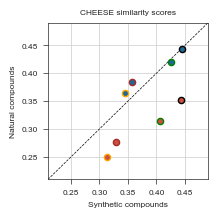

In [78]:
df_syn = df[df["category"] == "synthetic"]
df_nat = df[df["category"] == "natural"]

fig, axs = stylia.create_figure(
    1, 1, width=TWO_COLUMNS_WIDTH * 0.3, height=TWO_COLUMNS_WIDTH * 0.3
)

ax = axs.next()

statistic = "median"

df_syn = df[df["category"] == "synthetic"]
df_nat = df[df["category"] == "natural"]
df_znc_syn = df_syn[df_syn["database"] == "zinc15"]
df_znc_nat = df_nat[df_nat["database"] == "zinc15"]
df_ena_syn = df_syn[df_syn["database"] == "enamine-real"]
df_ena_nat = df_nat[df_nat["database"] == "enamine-real"]

from stylia.colors.colors import NamedColors

named_colors = NamedColors()

database_colors = {"zinc15": named_colors.blue, "enamine-real": named_colors.red}
search_type_colors = {
    "consensus": "black",
    "morgan": "green",
    "espsim_shape": "orange",
    "espsim_electrostatic": "brown",
}

ax.plot([0, 1], [0, 1], color="black", linestyle="--")

categories = ["synthetic", "natural"]
databases = ["zinc15", "enamine-real"]
search_types = ["consensus", "morgan", "espsim_shape", "espsim_electrostatic"]
for s in search_types:
    for d in databases:
        db = df[df["database"] == d]
        db = db[db["search_type"] == s]
        dx = db[db["category"] == categories[0]]
        dy = db[db["category"] == categories[1]]
        ax.scatter(
            dx[statistic],
            dy[statistic],
            color=database_colors[d],
            edgecolors=search_type_colors[s],
            zorder=1000,
            s=20,
        )
        # ax.plot([dx["median"], dx["median"]], [dy["perc_25"], dy["perc_75"]], color=search_type_colors[s])
        # ax.plot([dx["perc_25"], dx["perc_75"]], [dy["median"], dy["median"]], color=search_type_colors[s])

edgecolors = ["black", "green", "orange", "brown"]
print(df_ena_nat)

ax.set_xlim(0.21, 0.49)
ax.set_ylim(0.21, 0.49)
stylia.label(
    ax,
    title="CHEESE similarity scores",
    xlabel="Synthetic compounds",
    ylabel="Natural compounds",
)
stylia.save_figure("../figures/f2_a.png")

In [83]:
df = pd.read_csv("../results/cheese_popular_hits.csv")

df[df["database"] == "enamine-real"]

,smiles,inchikey,consensus_hits,consensus_syn_hits,consensus_nat_hits,consensus_score,consensus_syn_score,consensus_nat_score,database
481,COC1=CC(C=CC(=O)C2=CC(O)=CC=C2OC)=CC=C1O,CUEXEEYJFJFPRY-UHFFFAOYSA-N,15,0,15,8.766044,0.000000,8.766044,enamine-real
741,COC1=CC=C(/C=C/C2=CC=C(O)C(OC)=C2)C=C1O,VAHVYESYZVBMMS-ONEGZZNKSA-N,12,0,12,6.773445,0.000000,6.773445,enamine-real
803,CC1=CN=CC=C1C(=O)OC1=CC=CC(Cl)=C1,LQGOXAVJUCQGQS-UHFFFAOYSA-N,12,12,0,5.371598,5.371598,0.000000,enamine-real
804,Cc1cnccc1C(=O)Oc1cccc(Cl)c1,LQGOXAVJUCQGQS-UHFFFAOYSA-N,12,12,0,5.371598,5.371598,0.000000,enamine-real
808,CC1=CC=NC=C1C(=O)OC1=CC=CC(Cl)=C1,NFMVZDRXIDWOJY-UHFFFAOYSA-N,12,12,0,5.261085,5.261085,0.000000,enamine-real
...,...,...,...,...,...,...,...,...,...
84753,CC1=CNC(CC(N)=O)=C1C(=O)N1C[C@@H](CO)[C@H](C2=...,ISGYSFRBPWCXHC-GJZGRUSLSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84754,CC1=CNC(CC(N)=O)=C1C(=O)N[C@@H]1C[C@@H](C)CN(C...,STVHRCUPYVIGJH-TZMCWYRMSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84755,CC1=NC2=CC(C)=NN2C(C(=O)NCC2(C)CC(F)(F)CN2C(=O...,SSUAISVWFHICPR-UHFFFAOYSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84756,C#CCCC(=O)NCC1(C)CC(F)(F)CN1C(=O)C1=NN(C(C)C)C=N1,GHWZDSKKWHEZKT-UHFFFAOYSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real


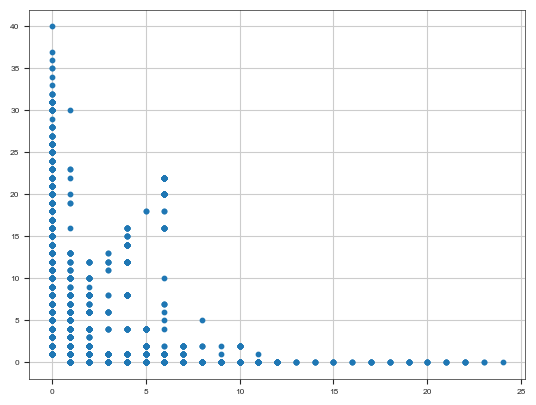

In [84]:
plt.scatter(df["consensus_syn_hits"], df["consensus_nat_hits"])